In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d amandam1/120-dog-breeds-breed-classification
!unzip /content/120-dog-breeds-breed-classification

In [10]:
import os
import numpy as np
import cv2
import shutil
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
main_dir = '/content/Images'

In [12]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(200, 200),
    batch_size=200,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    main_dir,
    target_size=(200, 200),
    batch_size=200,
    class_mode='categorical',
    subset='validation'
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [14]:
print(f"Shape of labels: {train_generator.labels.shape}")
print(f"Shape of labels: {validation_generator.labels.shape}")

Shape of labels: (16508,)
Shape of labels: (4072,)


In [15]:
total_train_images = train_generator.samples
print(f"Number of images in train_generator: {total_train_images}")

Number of images in train_generator: 16508


In [16]:
labels = (validation_generator.class_indices)

In [17]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[early_stopping]
)

Epoch 1/15
83/83 [==============================] - 273s 3s/step - loss: 4.0843 - accuracy: 0.1460 - val_loss: 2.6894 - val_accuracy: 0.3824
Epoch 2/15
83/83 [==============================] - 211s 3s/step - loss: 2.3086 - accuracy: 0.4281 - val_loss: 1.5914 - val_accuracy: 0.5675
Epoch 3/15
83/83 [==============================] - 209s 3s/step - loss: 1.6677 - accuracy: 0.5399 - val_loss: 1.3392 - val_accuracy: 0.6157
Epoch 4/15
83/83 [==============================] - 215s 3s/step - loss: 1.4376 - accuracy: 0.5935 - val_loss: 1.2248 - val_accuracy: 0.6481
Epoch 5/15
83/83 [==============================] - 210s 3s/step - loss: 1.3078 - accuracy: 0.6217 - val_loss: 1.1662 - val_accuracy: 0.6638
Epoch 6/15
83/83 [==============================] - 210s 3s/step - loss: 1.2157 - accuracy: 0.6443 - val_loss: 1.1265 - val_accuracy: 0.6744
Epoch 7/15
83/83 [==============================] - 209s 3s/step - loss: 1.1428 - accuracy: 0.6602 - val_loss: 1.0959 - val_accuracy: 0.6864
Epoch 8/15
83

In [ ]:
#model.save('/content/drive/MyDrive/save_models/120_dog_breeds_TL_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
labels = dict((v, k) for k, v in train_generator.class_indices.items())
labels

In [2]:
import tensorflow as tf

In [71]:
model= tf.keras.models.load_model("/content/drive/MyDrive/save_models/120_dog_breeds_TL_vgg16.h5")

In [84]:
img = tf.keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/dog_images/9.jpg', target_size=(200, 200)
)


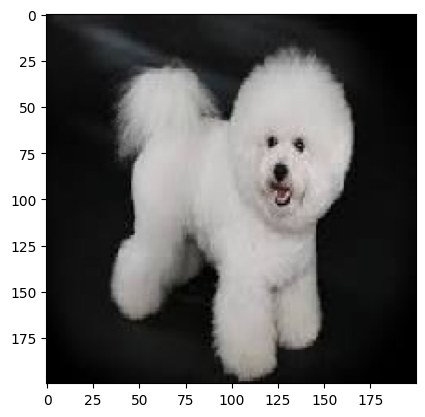

In [85]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [86]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [87]:
predictions = model.predict(img_array)
predicted_class = labels[np.argmax(predictions)]
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 459ms/step
Predicted class: n02113624-toy_poodle
